## Bifurcación de Hopf

$\dot{x} = y + \mu x , \dot{y} = -x + \mu y -x^{2}y$

La matriz jacobiana en el origen es $$ \begin{bmatrix}
\mu & 1\\
-1 -2x & \mu - x^{2} 
\end{bmatrix}|_{(0,0)} = \begin{bmatrix}
\mu & 1\\
-1 & \mu  
\end{bmatrix}$$
Los autovalores son $\lambda_{1,2} = \mu \pm i$ Entonces para $\mu < 0$ el origen es una espiral atractora y para $\mu > 0$ Es una espiral repulsora. Para ver si es supercrítica o subcrítica integro numéricamente varias condiciones iniciales cerca y lejos del punto para los dos valores de $\mu$. 

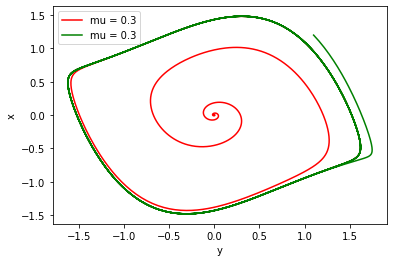

In [57]:
import numpy as np
from scipy.integrate import odeint
import pylab
import matplotlib.pyplot as plt 


#Bifurcación de Hopf 

t = np.linspace(0,50, 2500)

def dxdt(v,t,mu,uno):
    x,y = v
    dxdt = y + mu*x
    dydt = -x + mu*y - y*x**2
    
    return dxdt, dydt

mu, uno = 0.3, 1
x0,y0= 0.001,0.0001
v0 = x0, y0
x, y = odeint(dxdt, v0, t,args =(mu,uno)).T

x0,y0= 1.1,1.2
v0 = x0, y0
x2, y2 = odeint(dxdt, v0, t,args =(mu,uno)).T

pylab.plot(x,y, color='r',label = 'mu = '+str(mu))
pylab.plot(x2,y2, color='g',label = 'mu = '+str(mu))
pylab.xlabel('y')
pylab.ylabel('x')
pylab.legend()
pylab.show()

In [70]:
import numpy as np
from scipy.integrate import odeint
from scipy.special import legendre

def generate_hopf_fulldata(n_ics):
    """
    Generate initial conditions for the Hopf bifurcation

    Create toy data with Hopf bifurcation dynamics and
    Legendre polinomials in a 1D grid

    Arguments:
    n_ics - number of initial conditions
    Returns:
    X, dX - Array of n_ics time series and their derivatives with 500 samples in time and 30 in the spatial dimension

    """
    #In
    ic_means_in = np.array([0.0000001,0.0000001])
    ic_widths_in = np.array([0.002,0.0002])
    #Out
    ic_means_out = np.array([1,1])
    ic_widths_out = np.array([0.1,0.2])
    
    # training data
    ics_in = ic_widths_in*(np.random.rand(n_ics, 2)) + ic_means_in
    ics_out = ic_widths_out*(np.random.rand(n_ics, 2)) + ic_means_out
    ics = np.concatenate((ics_in,ics_out))

    d = 2 #Dimension del sistema

    dt = 0.05; ti = 0.; tf = 25.
    t = np.arange(ti,tf,dt)
    n_steps = len(t)

    Z = np.zeros((n_ics,n_steps,d))
    dZ = np.zeros(Z.shape)
    for i in range(n_ics):
        Z[i], dZ[i]= simulate_hopf(ics[i], t)

    n_points = 30

    space_modes = legendre_polinomials(n_points)

    X = np.zeros((n_ics,n_steps,n_points))
    x1 = np.zeros(X.shape)
    x2 = np.zeros(X.shape)
    x3 = np.zeros(X.shape)
    x4 = np.zeros(X.shape)
    x5 = np.zeros(X.shape)
    x6 = np.zeros(X.shape)
    for i in range(n_ics):
        for j in range(n_steps):
            x1[i,j] = space_modes[0] * Z[i,j,0]
            x2[i,j] = space_modes[1] * Z[i,j,1]
            x3[i,j] = space_modes[2] * Z[i,j,0]**3
            x4[i,j] = space_modes[3] * Z[i,j,1]**3


    X = x1 + x2 + x3 + x4 

    dX = np.zeros((n_ics,n_steps,n_points))
    dx1 = np.zeros(X.shape)
    dx2 = np.zeros(X.shape)
    dx3 = np.zeros(X.shape)
    dx4 = np.zeros(X.shape)
    for i in range(n_ics):
        for j in range(n_steps):
            dx1[i,j] = space_modes[0] * dZ[i,j,0]
            dx2[i,j] = space_modes[1] * dZ[i,j,1]
            dx3[i,j] = space_modes[2] * 2* dZ[i,j,0] * dZ[i,j,0]
            dx4[i,j] = space_modes[3] * 2 * Z[i,j,1] * dZ[i,j,1]

    dX = dx1 + dx2 + dx3 + dx4 

    return X, dX


def simulate_hopf(z0, t, mu=.3):
    """
    Simulate the dynamics of a Hopf bifurcation
    Arguments:
        z0 - Initial condition in the form of a 3-value list or array.
        t - Array of time points at which to simulate.
        mu - Hopf bfurcation parameter
    Returns:
        z, dz - Arrays of the trajectory values and their 1st and 2nd derivatives.
    """
    f = lambda z,t : [z[1] + mu*z[0], -z[0] + mu*z[1] - z[1]*z[0]**2]

    z = odeint(f, z0, t)

    dt = t[1] - t[0]
    dz = np.zeros(z.shape)
    for i in range(t.size):
        dz[i] = f(z[i],dt*i)
    return z, dz


def legendre_polinomials(n_points):
    n = n_points
    L = 1
    y_array = np.linspace(-L,L,30)

    modes = np.zeros((4,n))
    for i in range(4):
        modes[i] = legendre(i)(y_array)

    return modes


# Test
X, dX = generate_hopf_fulldata(200)


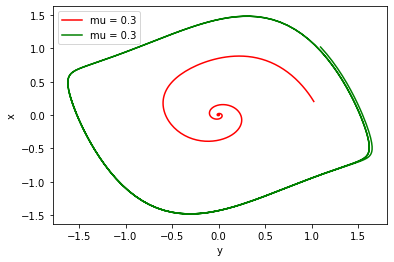

500

In [71]:
#checkeo que estén bien elegidas las rgiones
#In
ic_means_in = np.array([0.000001,0.000001])
ic_widths_in = np.array([0.001,0.0001])
#Out
ic_means_out = np.array([1,1])
ic_widths_out = np.array([0.1,0.2])
    
# training data
ics_in = ic_widths_in*(np.random.rand(2, 2)) + ic_means_in
ics_out = ic_widths_out*(np.random.rand(2, 2)) + ic_means_out
ics = np.concatenate((ics_in,ics_out))

dt = 0.05; ti = 0.; tf = 25.
t = np.arange(ti,tf,dt)
x2,y2 = simulate_hopf(ics[0],t)
x3,y3 = simulate_hopf(ics[2],t)
pylab.plot(x2[:,0],x2[:,1], color='r',label = 'mu = '+str(mu))
pylab.plot(x3[:,0],x3[:,1], color='g',label = 'mu = '+str(mu))
pylab.xlabel('y')
pylab.ylabel('x')
pylab.legend()
pylab.show()
len(t)